In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB

In [3]:
import os
os.chdir(r'E:\PML\Datasets-20230112T094652Z-001\Datasets')
import pandas as pd

In [4]:
from sklearn.preprocessing import LabelEncoder
pix = pd.read_csv("Image Segmentation/Image_Segmention.csv")
pix.head(10)

,Class,region.centroid.col,region.centroid.row,region.pixel.count,short.line.density.5,short.line.density.2,vedge.mean,vegde.sd,hedge.mean,hedge.sd,intensity.mean,rawred.mean,rawblue.mean,rawgreen.mean,exred.mean,exblue.mean,exgreen.mean,value.mean,saturation.mean,hue-mean
0,BRICKFACE,188,133,9,0.000000,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
1,BRICKFACE,105,139,9,0.000000,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
2,BRICKFACE,34,137,9,0.000000,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
3,BRICKFACE,39,111,9,0.000000,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773
4,BRICKFACE,16,128,9,0.000000,0.0,0.500000,0.077778,0.666667,0.311111,5.555555,6.888889,6.666666,3.111111,4.000000,3.333333,-7.333334,7.111111,0.561508,-0.985811
5,BRICKFACE,26,67,9,0.111111,0.0,1.000000,0.888890,2.444445,3.185185,20.000000,19.555555,25.888890,14.555555,-1.333333,17.666666,-16.333334,25.888890,0.436939,-1.623202
6,BRICKFACE,14,110,9,0.000000,0.0,1.722222,5.351851,2.666667,1.022223,17.925926,18.888890,21.444445,13.444445,2.888889,10.555555,-13.444445,21.444445,0.368848,-1.345096
7,BRICKFACE,11,108,9,0.000000,0.0,1.333333,0.800000,1.388889,0.951852,17.666666,19.000000,21.111110,12.888889,4.000000,10.333333,-14.333333,21.111110,0.388756,-1.302133
8,BRICKFACE,85,101,9,0.000000,0.0,1.333333,1.288888,1.277778,1.218518,21.296297,21.222221,26.777779,15.888889,-0.222222,16.444445,-16.222221,26.777779,0.404792,-1.558599
9,BRICKFACE,18,145,9,0.000000,0.0,0.388889,0.018518,0.611111,0.374074,3.925926,5.555555,4.000000,2.222222,4.888889,0.222222,-5.111111,5.555555,0.600529,-0.570940


In [7]:
X = pix.drop('Class', axis=1)
y = pix['Class']
X

,region.centroid.col,region.centroid.row,region.pixel.count,short.line.density.5,short.line.density.2,vedge.mean,vegde.sd,hedge.mean,hedge.sd,intensity.mean,rawred.mean,rawblue.mean,rawgreen.mean,exred.mean,exblue.mean,exgreen.mean,value.mean,saturation.mean,hue-mean
0,188,133,9,0.000000,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
1,105,139,9,0.000000,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
2,34,137,9,0.000000,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
3,39,111,9,0.000000,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773
4,16,128,9,0.000000,0.0,0.500000,0.077778,0.666667,0.311111,5.555555,6.888889,6.666666,3.111111,4.000000,3.333333,-7.333334,7.111111,0.561508,-0.985811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,36,243,9,0.111111,0.0,1.888889,1.851851,2.000000,0.711110,13.333333,9.888889,12.111111,18.000000,-10.333333,-3.666667,14.000000,18.000000,0.452229,2.368311
205,186,218,9,0.000000,0.0,1.166667,0.744444,1.166667,0.655555,13.703704,10.666667,12.666667,17.777779,-9.111111,-3.111111,12.222222,17.777779,0.401347,2.382684
206,197,236,9,0.000000,0.0,2.444444,6.829628,3.333333,7.599998,16.074074,13.111111,16.666668,18.444445,-8.888889,1.777778,7.111111,18.555555,0.292729,2.789800
207,208,240,9,0.111111,0.0,1.055556,0.862963,2.444444,5.007407,14.148149,10.888889,13.000000,18.555555,-9.777778,-3.444444,13.222222,18.555555,0.421621,2.392487


In [8]:
label=LabelEncoder()
le_y=label.fit_transform(y)
le_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [14]:
kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)
nb = GaussianNB()
res= cross_val_score(nb, X, le_y, scoring = 'neg_log_loss', cv=kfold)
print(res)
print(res.mean())

[-5.69429675 -1.71003266 -5.00025803 -2.47940234 -4.69608346]
-3.916014650972882


# Bivariate Normal Distribution #

The “regular” normal distribution has one random variable; A bivariate normal distribution is made up of two independent random variables. The two variables in a bivariate normal are both are normally distributed, and they have a normal distribution when both are added together. Visually, the bivariate normal distribution is a three-dimensional bell curve.

The bivariate normal distribution is the statistical distribution with probability density function :
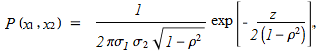



Where:

μ = mean
&sigma = standard deviation
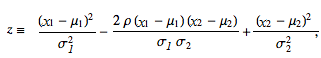

And:
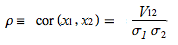
bivariate normal

ρ correlation of x1 and x2.
V x12= covariance of x1 and x2.

To further understand the multivariate normal distribution it is helpful to look at the bivariate normal distribution. Here our understanding is facilitated by being able to draw pictures of what this distribution looks like.

We have just two variables, 
 X1 and X2 
 and that these are bivariately normally distributed with mean vector components 
 \mu_{1} and \mu_{2}
 and variance-covariance matrix shown below:
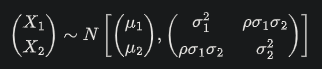

The Bivariate Normal Distribution has the following Curve:
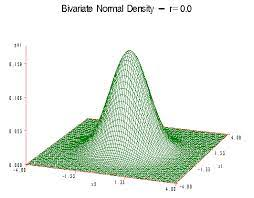

## Variance Co-Variance Matrix ##

A variance-covariance matrix is a square matrix that contains the variances and covariances associated with several variables. The diagonal elements of the matrix contain the variances of the variables and the off-diagonal elements contain the covariances between all possible pairs of variables.

This is for multivariate data :
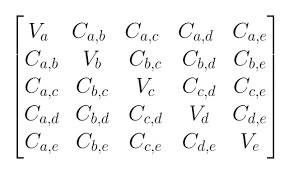

# Linear Discriminant Analysis(LDA) - Univariate #

Logistic regression is a classification algorithm traditionally limited to only two-class classification problems.

If you have more than two classes then Linear Discriminant Analysis is the preferred linear classification technique.

And for more than two class is quadratic discriminanat analysis

# What is Binary Classification?
In machine learning, binary classification is a supervised learning algorithm that categorizes new observations into one of two classes.

The following are a few binary classification applications, where the 0 and 1 columns are two possible classes for each observation:
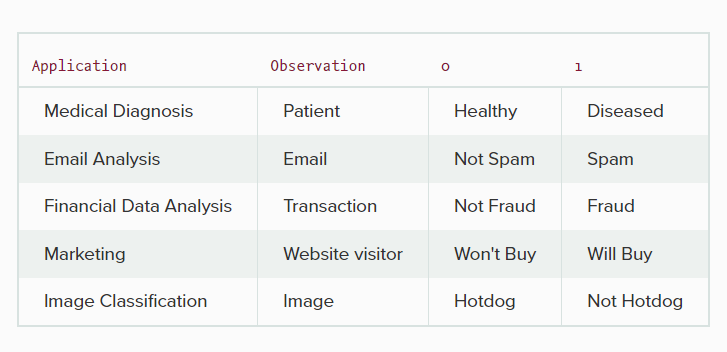

# What is multiclass classification?
Classification means categorizing data and forming groups based on the similarities. In a dataset, the independent variables or features play a vital role in classifying our data. When we talk about multiclass classification, we have more than two classes in our dependent or target variable, as can be seen in Fig.1:
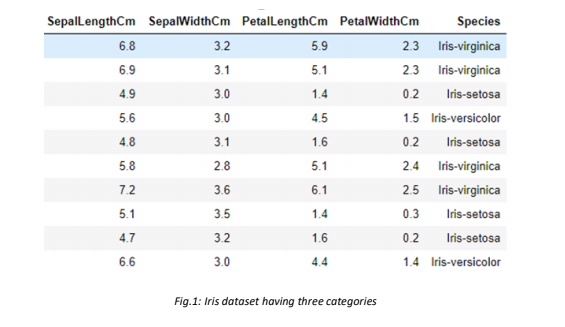

The above picture is taken from the Iris dataset which depicts that the target variable has three categories i.e., Virginica, setosa, and Versicolor, which are three species of Iris plant. We might use this dataset later, as an example of a conceptual understanding of multiclass classification.

# What is Linear Discriminant Analysis (LDA)?
Although the logistic regression algorithm is limited to only two-class, linear Discriminant analysis is applicable for more than two classes of classification problems.

Linear Discriminant analysis is one of the most popular dimensionality reduction techniques used for supervised classification problems in machine learning. It is also considered a pre-processing step for modeling differences in ML and applications of pattern classification.

Whenever there is a requirement to separate two or more classes having multiple features efficiently, the Linear Discriminant Analysis model is considered the most common technique to solve such classification problems. For e.g., if we have two classes with multiple features and need to separate them efficiently. When we classify them using a single feature, then it may show overlapping.
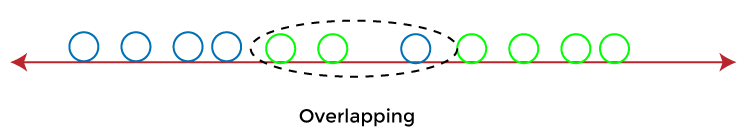



Example:
Let's assume we have to classify two different classes having two sets of data points in a 2-dimensional plane as shown below image:
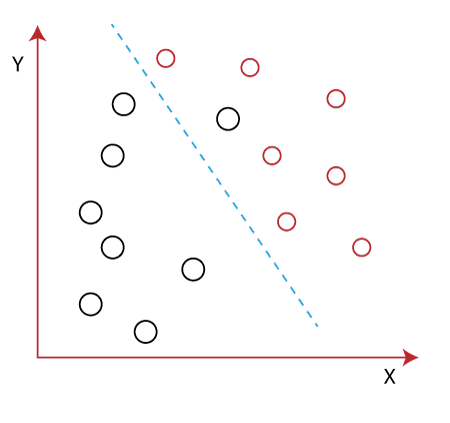

Linear Discriminant Analysis (LDA) in Machine Learning
However, it is impossible to draw a straight line in a 2-d plane that can separate these data points efficiently but using linear Discriminant analysis; we can dimensionally reduce the 2-D plane into the 1-D plane. Using this technique, we can also maximize the separability between multiple classes.

#  Assumptions of LDA
**LDA assumes:

1. Each feature (variable or dimension or attribute) in the dataset is a gaussian distribution. In other words, each feature in the dataset is shaped like a bell-shaped curve.
2. Each feature has the same variance, the value of each feature varies around the mean with the same amount on average.

3. Each feature is assumed to be randomly sampled.

4. Lack of multicollinearity in independent features. Increase in correlations between independent features and the power of prediction decreases.

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
bank =  pd.read_csv("Bankruptcy/Bankruptcy.csv")
bank.tail()

,NO,D,YR,R1,R2,R3,R4,R5,R6,R7,...,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24
127,128,1,77,0.27,0.03,0.07,0.10,0.09,0.18,0.26,...,0.11,0.06,0.12,0.17,7.56,2.07,1.45,0.06,0.13,0.19
128,129,1,77,0.32,0.03,0.03,0.09,0.05,0.06,0.16,...,0.17,0.07,0.09,0.26,5.99,1.27,2.74,0.06,0.08,0.21
129,130,1,78,0.08,0.01,0.02,0.05,0.04,0.07,0.15,...,0.19,0.07,0.12,0.26,7.14,1.89,2.10,0.07,0.12,0.26
130,131,1,78,0.14,0.01,0.05,0.07,0.02,0.09,0.14,...,0.07,0.02,0.10,0.15,170.96,4.55,1.45,0.02,0.10,0.14
131,132,1,78,0.26,0.07,0.12,0.17,0.00,0.01,0.01,...,0.05,0.04,0.07,0.10,5.44,1.84,1.40,0.05,0.08,0.12


In [21]:
X=bank.drop(['NO','D','YR'], axis=1)
y=bank['D']
X,y

(       R1    R2    R3    R4    R5    R6    R7     R8    R9   R10  ...   R15  \
 0    0.23  0.08  0.02  0.03  0.46  0.12  0.19  10.36  1.17  0.40  ...  0.05   
 1    0.19  0.07  0.09  0.12  0.02  0.02  0.03   3.13  1.73  0.60  ...  0.09   
 2    0.07  0.02  0.03  0.05  0.06  0.10  0.14   2.41  1.36  0.41  ... -0.03   
 3    0.07  0.03  0.04  0.04  0.04  0.06  0.06   5.55  1.13  0.44  ... -0.02   
 4    0.09  0.02  0.03  0.04  0.06  0.08  0.11   2.85  1.88  0.42  ...  0.02   
 ..    ...   ...   ...   ...   ...   ...   ...    ...   ...   ...  ...   ...   
 127  0.27  0.03  0.07  0.10  0.09  0.18  0.26   7.58  2.24  0.28  ...  0.11   
 128  0.32  0.03  0.03  0.09  0.05  0.06  0.16   3.24  5.44  0.46  ...  0.17   
 129  0.08  0.01  0.02  0.05  0.04  0.07  0.15   3.82  2.41  0.37  ...  0.19   
 130  0.14  0.01  0.05  0.07  0.02  0.09  0.14   8.18  1.57  0.11  ...  0.07   
 131  0.26  0.07  0.12  0.17  0.00  0.01  0.01   6.13  1.57  0.39  ...  0.05   
 
       R16   R17   R18     R19   R20  

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=2023,
                                                    test_size=0.3)

In [32]:
lda= LinearDiscriminantAnalysis()
qda= QuadraticDiscriminantAnalysis()
lda.fit(X_train,y_train)
qda.fit(X_train,y_train)

QuadraticDiscriminantAnalysis()

In [26]:
y_pred=lda.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0], dtype=int64)

In [33]:
y_qpred=qda.predict(X_test)
y_qpred

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0], dtype=int64)

In [28]:
print(accuracy_score(y_test,y_pred))

0.825


In [34]:
print(accuracy_score(y_test,y_qpred))

0.775


In [31]:
y_pred_prob = lda.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, y_pred_prob))
print(log_loss(y_test, y_pred_prob))

0.8574999999999999
0.6921778582394723


In [36]:
y_qpred_prob = qda.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, y_qpred_prob))
print(log_loss(y_test, y_qpred_prob))

0.8624999999999999
4.295443221215284


In [37]:
kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)
res= cross_val_score(lda, X, y, scoring = 'neg_log_loss', cv=kfold)
print(res)
print(res.mean())

[-0.77385893 -1.50101645 -0.43469345 -0.72311624 -0.47617522]
-0.781772058333291


In [39]:
res= cross_val_score(qda, X, y, scoring = 'neg_log_loss', cv=kfold)
print(res)
print(res.mean())

[-6.7889451  -8.67256466 -2.44481883 -6.81273036 -5.93825098]
-6.131461987189647


***

In [40]:
pix = pd.read_csv("Image Segmentation/Image_Segmention.csv")
pix.head(10)

,Class,region.centroid.col,region.centroid.row,region.pixel.count,short.line.density.5,short.line.density.2,vedge.mean,vegde.sd,hedge.mean,hedge.sd,intensity.mean,rawred.mean,rawblue.mean,rawgreen.mean,exred.mean,exblue.mean,exgreen.mean,value.mean,saturation.mean,hue-mean
0,BRICKFACE,188,133,9,0.000000,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
1,BRICKFACE,105,139,9,0.000000,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
2,BRICKFACE,34,137,9,0.000000,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
3,BRICKFACE,39,111,9,0.000000,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773
4,BRICKFACE,16,128,9,0.000000,0.0,0.500000,0.077778,0.666667,0.311111,5.555555,6.888889,6.666666,3.111111,4.000000,3.333333,-7.333334,7.111111,0.561508,-0.985811
5,BRICKFACE,26,67,9,0.111111,0.0,1.000000,0.888890,2.444445,3.185185,20.000000,19.555555,25.888890,14.555555,-1.333333,17.666666,-16.333334,25.888890,0.436939,-1.623202
6,BRICKFACE,14,110,9,0.000000,0.0,1.722222,5.351851,2.666667,1.022223,17.925926,18.888890,21.444445,13.444445,2.888889,10.555555,-13.444445,21.444445,0.368848,-1.345096
7,BRICKFACE,11,108,9,0.000000,0.0,1.333333,0.800000,1.388889,0.951852,17.666666,19.000000,21.111110,12.888889,4.000000,10.333333,-14.333333,21.111110,0.388756,-1.302133
8,BRICKFACE,85,101,9,0.000000,0.0,1.333333,1.288888,1.277778,1.218518,21.296297,21.222221,26.777779,15.888889,-0.222222,16.444445,-16.222221,26.777779,0.404792,-1.558599
9,BRICKFACE,18,145,9,0.000000,0.0,0.388889,0.018518,0.611111,0.374074,3.925926,5.555555,4.000000,2.222222,4.888889,0.222222,-5.111111,5.555555,0.600529,-0.570940


In [41]:
X = pix.drop('Class', axis=1)
y = pix['Class']
X

,region.centroid.col,region.centroid.row,region.pixel.count,short.line.density.5,short.line.density.2,vedge.mean,vegde.sd,hedge.mean,hedge.sd,intensity.mean,rawred.mean,rawblue.mean,rawgreen.mean,exred.mean,exblue.mean,exgreen.mean,value.mean,saturation.mean,hue-mean
0,188,133,9,0.000000,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
1,105,139,9,0.000000,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
2,34,137,9,0.000000,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
3,39,111,9,0.000000,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773
4,16,128,9,0.000000,0.0,0.500000,0.077778,0.666667,0.311111,5.555555,6.888889,6.666666,3.111111,4.000000,3.333333,-7.333334,7.111111,0.561508,-0.985811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,36,243,9,0.111111,0.0,1.888889,1.851851,2.000000,0.711110,13.333333,9.888889,12.111111,18.000000,-10.333333,-3.666667,14.000000,18.000000,0.452229,2.368311
205,186,218,9,0.000000,0.0,1.166667,0.744444,1.166667,0.655555,13.703704,10.666667,12.666667,17.777779,-9.111111,-3.111111,12.222222,17.777779,0.401347,2.382684
206,197,236,9,0.000000,0.0,2.444444,6.829628,3.333333,7.599998,16.074074,13.111111,16.666668,18.444445,-8.888889,1.777778,7.111111,18.555555,0.292729,2.789800
207,208,240,9,0.111111,0.0,1.055556,0.862963,2.444444,5.007407,14.148149,10.888889,13.000000,18.555555,-9.777778,-3.444444,13.222222,18.555555,0.421621,2.392487


In [42]:
label=LabelEncoder()
le_y=label.fit_transform(y)
le_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [43]:
kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
res= cross_val_score(lda, X, le_y, scoring = 'neg_log_loss', cv=kfold)
resq= cross_val_score(qda, X, le_y, scoring = 'neg_log_loss', cv=kfold)
print(res)
print(res.mean())
print(resq)
print(resq.mean())

[-1.10245401 -0.40757761 -0.86359343 -0.31856662 -1.49446444]
-0.8373312219407154
[-14.5890978   -9.44000446 -15.44728002 -19.73819114 -15.82404295]
-15.007723275259583


C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


***

In [44]:
car = pd.read_csv("Vehicle Silhouettes/Vehicle.csv")
car.head()

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [45]:
X = car.drop('Class', axis=1)
y = car['Class']
X

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195
842,89,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197
843,106,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201
844,86,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195


In [46]:
label=LabelEncoder()
le_y=label.fit_transform(y)
le_y

array([3, 3, 2, 3, 0, 0, 0, 3, 3, 2, 3, 2, 0, 3, 0, 1, 3, 0, 2, 1, 0, 3,
       0, 0, 2, 3, 2, 2, 0, 2, 3, 2, 1, 1, 1, 3, 0, 3, 2, 0, 1, 3, 3, 2,
       2, 3, 3, 0, 3, 2, 2, 2, 1, 0, 0, 3, 2, 3, 1, 3, 1, 1, 3, 0, 0, 1,
       0, 1, 3, 0, 1, 1, 1, 1, 3, 1, 2, 2, 0, 0, 0, 0, 3, 1, 0, 0, 3, 3,
       0, 1, 2, 1, 2, 3, 0, 1, 2, 0, 1, 0, 0, 3, 3, 3, 0, 2, 1, 1, 0, 0,
       3, 3, 1, 1, 3, 3, 1, 2, 0, 0, 2, 3, 3, 2, 3, 3, 0, 0, 3, 0, 2, 2,
       2, 3, 1, 3, 3, 3, 2, 3, 2, 0, 1, 0, 1, 1, 3, 0, 2, 3, 2, 0, 1, 2,
       3, 0, 1, 3, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 0, 3, 1, 0, 3, 0, 3, 0,
       1, 0, 0, 3, 2, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 3, 2, 0, 2, 0, 2, 0,
       0, 0, 3, 2, 1, 1, 3, 3, 1, 0, 0, 1, 1, 3, 0, 0, 1, 1, 2, 1, 0, 3,
       1, 3, 0, 0, 2, 3, 2, 3, 2, 2, 3, 2, 0, 2, 3, 3, 0, 0, 1, 0, 1, 1,
       0, 2, 3, 3, 0, 2, 1, 2, 3, 1, 3, 0, 3, 2, 2, 1, 2, 1, 2, 2, 3, 3,
       2, 0, 0, 2, 3, 3, 0, 2, 3, 3, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 3, 2,
       0, 3, 1, 2, 3, 3, 0, 3, 0, 0, 0, 2, 2, 0, 2,

In [47]:
kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
res= cross_val_score(lda, X, le_y, scoring = 'neg_log_loss', cv=kfold)
resq= cross_val_score(qda, X, le_y, scoring = 'neg_log_loss', cv=kfold)
print(res)
print(res.mean())
print(resq)
print(resq.mean())

[-0.49449291 -0.51497434 -0.39854307 -0.47277434 -0.533159  ]
-0.4827887345094789
[-0.54766202 -0.41221345 -0.76292477 -0.41765139 -0.45960507]
-0.5200113426313611
